In [1]:
import pandas as pd
import numpy as np

In [2]:
crop = pd.read_csv('Dataset.csv')

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [5]:
crop.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
corr = crop.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

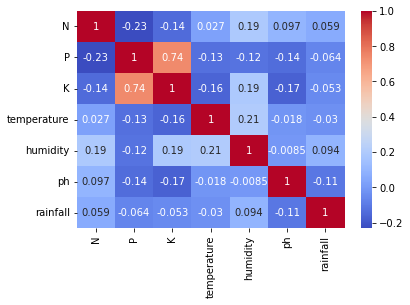

In [9]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm',fmt='.2g')

In [10]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [11]:
crop_dict={
    'rice':1,
    'maize':2,
    'chickpea':3,
    'kidneybeans':4,
    'pigeonpeas':5,
    'mothbeans':6,
    'mungbean':7,
    'blackgram':8,
    'lentil':9,
    'pomegranate':10,
    'banana':11,
    'mango':12,
    'grapes':13,
    'watermelon':14,
    'muskmelon':15,
    'apple':16,
    'orange':17,
    'papaya':18,
    'coconut':19,
    'cotton':20,
    'jute':21,
    'coffee':22
}

In [12]:
crop['crop_num'] = crop['label'].map(crop_dict)


In [13]:
crop['crop_num'].value_counts()

1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: crop_num, dtype: int64

In [14]:
crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [15]:
corr1=crop.corr()
corr1

,N,P,K,temperature,humidity,ph,rainfall,crop_num
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,0.282787
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.167951
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,0.143703
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.180571
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.524452
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,0.052389
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.121486
crop_num,0.282787,-0.167951,0.143703,0.180571,0.524452,0.052389,0.121486,1.000000


<AxesSubplot:>

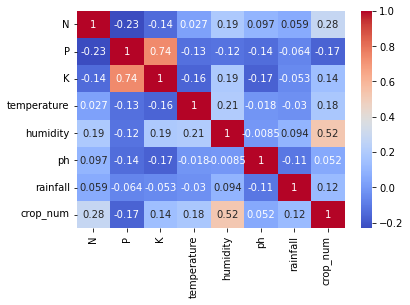

In [16]:
import seaborn as sns
sns.heatmap(corr1,annot=True,cbar=True,cmap='coolwarm',fmt='.2g')

In [17]:
x = crop.drop('crop_num',axis='columns')
x.shape

(2200, 7)

In [18]:
y = crop['crop_num']
y.shape

(2200,)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
 x_train, x_test, y_train, y_test = train_test_split(  x, y, test_size=0.25, random_state=42)

In [21]:
x_train.shape

(1650, 7)

In [22]:
y_test.shape

(550,)

In [23]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [24]:
ms.fit(x_train)
x_train= ms.transform(x_train)
x_test = ms.transform(x_test)
x_train

array([[0.15714286, 0.22142857, 0.055     , ..., 0.42584062, 0.7277185 ,
        0.15897041],
       [0.12857143, 0.15714286, 0.18      , ..., 0.91047512, 0.57082408,
        0.30360025],
       [0.43571429, 0.45      , 0.225     , ..., 0.90100613, 0.5114028 ,
        0.80055503],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [35]:
sc.fit(x_train)
x_train= sc.transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[-7.74026344e-01, -5.22604462e-01, -6.28724908e-01, ...,
        -9.51256909e-01,  2.19982609e+00, -6.86012983e-01],
       [-8.81256962e-01, -7.93767155e-01, -1.37942559e-01, ...,
         9.39856699e-01,  9.02028907e-01,  4.18192366e-02],
       [ 2.71472181e-01,  4.41529556e-01,  3.87390868e-02, ...,
         9.02907360e-01,  4.10508789e-01,  2.54268422e+00],
       ...,
       [-1.06891054e+00, -5.22604462e-01, -3.34255499e-01, ...,
        -9.05356554e-01,  1.70580458e-03, -4.07223532e-02],
       [-1.06891054e+00,  2.12876409e+00,  3.06195836e+00, ...,
         3.82480441e-01, -1.45336714e-01, -5.62739020e-01],
       [-5.05949799e-01,  7.42821437e-01, -5.10937144e-01, ...,
        -4.23855858e-01,  6.85524273e-01, -8.88186049e-01]])

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
ypred = rfc.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,ypred)
print(cm)
accuracy_score(y_test,ypred)

[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

0.9890909090909091

In [44]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

0.9890909090909091

In [45]:
accuracy = accuracy_score(y_test,ypred)
print("Accuracy of model is:",accuracy)

Accuracy of model is: 0.9890909090909091


In [46]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
  features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
  prediction = rfc.predict(features).reshape(1,-1)
  return prediction[0]

In [47]:
N = 20
P = 30
K = 40
temperature = 40
humidity = 20
ph = 30
rainfall = 50
predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

crop_dict ={1:'rice',2: 'maize',3:'chickpea', 4:'kidneybeans',5:'pigeonpeas',6: 'mothbeans',7:'mungbean',8:'blackgram',9:'lentil',10:'pomegranate',11:'banana',12:'mango',
            13:'grapes',14:'watermelon',15:'muskmelon',16: 'apple',17:'orange',18: 'papaya',19: 'coconut',20: 'cotton',21: 'jute',22: 'coffee'}
if predict[0] in crop_dict:
  crop=crop_dict[predict[0]]
  print("{} is a best crop to be cultivated.".format(crop)) 
else:
  print("Sorry are not able to recommend a proper crop for this environment.")


apple is a best crop to be cultivated.


In [48]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))